In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class Rectangles():
    def __init__(self, ax, l=1, h=1):
        '''
        takes matplotlib ax element and plots rectangles
        '''
        self.ax = ax
        self.l = l
        self.h = h
    
    def make_rect(self, xg, yg, **kwargs):
        l = self.l
        h = self.h
        xl = np.array([0,l,l,0,0])
        yl = np.array([0,0,h,h,0])
        self.ax.plot(xg+xl, yg+yl, **kwargs)
        
    def make_rect_array(self, xg, yg, N, color = 'k', linewidth=1, **kwargs):
        kwargs['color'] = color
        kwargs['linewidth']=linewidth
        x_offset = self.l
        
        
        for i in range(N):
            self.make_rect(xg+i*x_offset, yg,**kwargs)
            
    def make_diffusion_arrows(self, xg, yg, color = 'k', linewidth=1, **kwargs):
        l = self.l
        h = self.h
        xl1 = np.array([ 0.4, 0.4, 0.3]) + xg
        yl1 = np.array([-0.2, 0.2, 0.1]) + yg
        xl2 = np.array([ 0.6, 0.6, 0.7]) + xg
        yl2 = np.array([0.2, -0.2,-0.1]) + yg
        
        self.ax.plot(xl1,yl1,color =color,linewidth=linewidth,**kwargs)
        self.ax.plot(xl2,yl2,color =color,linewidth=linewidth,**kwargs)        

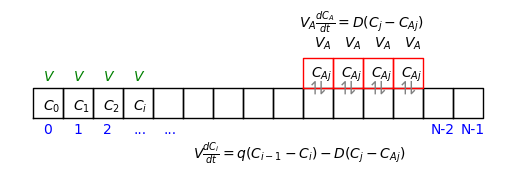

In [12]:
N = 15
fig, ax = plt.subplots()
ax.set(aspect = 'equal', ylim=[-1,3])
rects = Rectangles(ax, h=1)
rects.make_rect_array(0,0,N)
rects.make_rect_array(9,rects.h,4,color= 'red')
for n in range(9,13): rects.make_diffusion_arrows(n,1,color = 'grey')
for n, txt in enumerate([0,1,2,'...','...']): ax.text(n+0.35,-0.5, txt, color = 'b')
for n, txt in zip([13,14],['N-2', 'N-1']): ax.text(n+0.25,-0.5, txt, color = 'b')  
for n, txt in enumerate(list(range(3))+['i']): ax.text(n+0.35,0.25, f'$C_{txt}$')
for n in range(4): ax.text(n+0.35,1.25, f'$V$', color= 'green')
for n, txt in zip([9,10,11,12],['$V_A$']*4): ax.text(n+0.35,2.35, txt)
for n, txt in zip([9,10,11,12],['$C_{Aj}$']*4): ax.text(n+0.25,1.35, txt)


txt = r'$V\frac{dC_i}{dt} =q\left(C_{i-1}-C_i\right)-D(C_j-C_{Aj})$'
ax.text(5+0.35,-1.35, txt)
txt = r'$V_A\frac{dC_A}{dt} =D(C_j-C_{Aj})$'
ax.text(8.5+0.35,3., txt)
a=ax.axis('off')